# libraries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)
from keras.utils import Sequence

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal
import os
import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight

import pickle

pandas: 1.4.4
geopandas: 1.22.3
Tensorflow/Keras: 2.9.0
pandas: 1.4.4
numpy: 1.22.3


# functions

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import brier_score_loss

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [40]:
def evaluate_perf(test_inputs,test_outputs,day=0):
    t = model.predict(test_inputs)
    one_day_t = t
    one_day_y = test_outputs
    
    ranges = [0.025,0.05,0.075,0.1]
    
    for j in ranges:
        classes = []
        for i in one_day_t.reshape(-1,1):
            if i<=j: classes.append(0)
            else: classes.append(1)
    
    # confusion matrix with threshold on 0.1, otherwise always 0 
        ConfusionMatrixDisplay(confusion_matrix(one_day_y.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
        ConfusionMatrixDisplay(confusion_matrix(one_day_y.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    
    plot_roc(one_day_t.reshape(-1,1),one_day_y.reshape(-1,1))
    
    display = CalibrationDisplay.from_predictions(one_day_y.reshape(-1,1), one_day_t.reshape(-1,1), n_bins=10)

    print(f'All zeros Brier score: {brier_score_loss(one_day_y.reshape(-1,1), np.zeros(len(one_day_y.reshape(-1,1))))}')
    print(f'Model Brier score: {brier_score_loss(one_day_y.reshape(-1,1), one_day_t.reshape(-1,1))}')
    

In [111]:
def extract_images_new(df, n_filters, verbose=False):
    times = df.time.unique()
    number_of_img, rows, cols = len(times), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, n_filters) )
    #print(images.shape)
    df = df.set_index(['time','latitude','longitude'], drop=True)
    df.sort_index(level=['time','latitude', 'longitude'], ascending=[1,0,1], inplace=True)
    k=0
    
    for day in range(0,number_of_img):
        
        images[k,:,:,:] = df.loc(axis=0)[times[day]].values.reshape(rows,cols,n_filters)
        if (k%100==0) & (verbose==True): print(k)
        k += 1
    return images

# DataGenerator

In [33]:
from tensorflow import convert_to_tensor

class DataGenerator(Sequence):
    def __init__(self, x_paths, y_paths, batch_size=10512):
        self.x_paths = x_paths
        self.y_paths = y_paths
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_x_paths = self.x_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_paths = self.y_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_x = [np.load(path) for path in batch_x_paths]
        batch_y = [np.load(path) for path in batch_y_paths]

        batch_x = [convert_to_tensor(x) for x in batch_x]
        batch_y = [convert_to_tensor(y) for y in batch_y]
        batch_x = np.array(batch_x,  dtype=object).astype(np.float32)
        batch_y = np.array(batch_y,  dtype=object).astype(np.float32)
        return batch_x, batch_y

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x_paths, y_paths, batch_size=10512):
        self.x_paths = x_paths
        self.y_paths = y_paths
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_x_paths = self.x_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_paths = self.y_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_x = []
        batch_y = []

        for path in batch_x_paths:
            data = np.load(path)
            if data.shape != batch_x.shape[1:]:  # Check if shape matches previous loaded data
                raise ValueError("Loaded data has different shapes")
            batch_x.append(data)

        for path in batch_y_paths:
            data = np.load(path)
            if data.shape != batch_y.shape[1:]:  # Check if shape matches previous loaded data
                raise ValueError("Loaded data has different shapes")
            batch_y.append(data)

        batch_x = np.array(batch_x).astype(np.float32)
        batch_y = np.array(batch_y).astype(np.float32)

        return batch_x, batch_y

In [11]:
from tensorflow.keras.utils import Sequence
import numpy as np

class DataGenerator(Sequence):
    def __init__(self, x_paths, y_paths, batch_size=10512):
        self.x_paths = x_paths
        self.y_paths = y_paths
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_x_paths = self.x_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_paths = self.y_paths[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_x = [np.load(path) for path in batch_x_paths]
        batch_y = [np.load(path) for path in batch_y_paths]

        batch_x = np.array(batch_x)
        batch_y = np.array(batch_y)

        return batch_x, batch_y

In [26]:
##################################training sets
folder_name = os.listdir('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/imgs')
folder_name.remove('.DS_Store' )

path_training_img = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/imgs'
path_training_targets = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/targets'

path_list_img = []
path_list_targets = []

for fitem in folder_name:
    path_imgs = path_training_img+'/'+fitem+'/'
    path_list_img.append(path_imgs)

    path_targets = path_training_targets+'/'+fitem+'/'
    path_list_targets.append(path_targets)
    
trainin_imgs_addr = []
trainin_targets_addr = []

for item_path in path_list_img:
    folder_item = os.listdir(item_path)
    #print(type(str(folder_item)))
    paths_imgs = item_path + folder_item[0]
    trainin_imgs_addr.append(paths_imgs)

for item_path_t in path_list_targets:
    folder_item_t = os.listdir(item_path_t)
    #print(type(str(folder_item)))
    paths_targets = item_path_t + folder_item_t[0]
    trainin_targets_addr.append(paths_targets)
    
##################################validation sets
folder_name_val = os.listdir('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/val/imgs')
folder_name_val .remove('.DS_Store' )

path_training_img_val = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/val/imgs'
path_training_targets_val = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/val/targets'

path_list_img_val = []
path_list_targets_val = []

for fitem_val in folder_name_val:
    path_imgs_val = path_training_img_val+'/'+fitem_val+'/'
    path_list_img_val.append(path_imgs_val)

    path_targets_val = path_training_targets_val+'/'+fitem_val+'/'
    path_list_targets_val.append(path_targets_val)
    
trainin_imgs_addr_val = []
trainin_targets_addr_val = []

for item_path_val in path_list_img_val:
    folder_item_val = os.listdir(item_path_val)
    #print(type(str(folder_item)))
    paths_imgs_val = item_path_val + folder_item_val[0]
    trainin_imgs_addr_val.append(paths_imgs_val)

for item_path_t_val in path_list_targets_val:
    folder_item_t_val = os.listdir(item_path_t_val)
    #print(type(str(folder_item)))
    paths_targets_val = item_path_t_val + folder_item_t_val[0]
    trainin_targets_addr_val.append(paths_targets_val)

In [34]:
data_generator = DataGenerator(trainin_imgs_addr, trainin_targets_addr)
for x,y in data_generator:
    print(x,y)

    

ValueError: setting an array element with a sequence.

In [ ]:
data_generator_val = DataGenerator(trainin_imgs_addr_val, trainin_targets_addr_val)
for x,y in data_generator_val:
    print(x,y)


# data loading


In [43]:
#x = np.load('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/imgs/1980/img_1980.npy')
df = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/training_windows_10var.csv')


In [64]:
df1 = df.loc[(df.time>='1980-01-01') & (df.time<'1981-01-01')]

df1['new_target'] = df1.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
y_ds1= df1.loc[:,['time','latitude','longitude', 'new_target']]
variables_y = [ 'new_target']
print(y_ds1.time.unique())
y_ds1_img = extract_images_new(y_ds1, 1, verbose=False)

['1980-01-01' '1980-01-02' '1980-01-03' '1980-01-04' '1980-01-05'
 '1980-01-06' '1980-01-07' '1980-01-08' '1980-01-09' '1980-01-10'
 '1980-01-11' '1980-01-12' '1980-01-13' '1980-01-14' '1980-01-15'
 '1980-01-16' '1980-01-17' '1980-01-18' '1980-01-19' '1980-01-20'
 '1980-01-21' '1980-01-22' '1980-01-23' '1980-01-24' '1980-01-25'
 '1980-01-26' '1980-01-27' '1980-01-28' '1980-01-29' '1980-01-30'
 '1980-01-31' '1980-02-01' '1980-02-02' '1980-02-03' '1980-02-04'
 '1980-02-05' '1980-02-06' '1980-02-07' '1980-02-08' '1980-02-09'
 '1980-02-10' '1980-02-11' '1980-02-12' '1980-02-13' '1980-02-14'
 '1980-02-15' '1980-02-16' '1980-02-17' '1980-02-18' '1980-02-19'
 '1980-02-20' '1980-02-21' '1980-02-22' '1980-02-23' '1980-02-24'
 '1980-02-25' '1980-02-26' '1980-02-27' '1980-02-28' '1980-02-29'
 '1980-03-01' '1980-03-02' '1980-03-03' '1980-03-04' '1980-03-05'
 '1980-03-06' '1980-03-07' '1980-03-08' '1980-03-09' '1980-03-10'
 '1980-03-11' '1980-03-12' '1980-03-13' '1980-03-14' '1980-03-15'
 '1980-03-

/var/folders/6l/2k5dphhj4z30f5zpqx44561c0000gn/T/ipykernel_1711/2088674556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_target'] = df1.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)


In [112]:
def Generator(File_address, target_address, Batch_Size=1):
    while True:
        df = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/training_windows_10var.csv')

        for B in range(0, len(File_address)):
            X_batch = []
            Y_batch = []
            addresses_X = File_address[B]
            addresses_Y = target_address[B]
            print(addresses_X,addresses_Y)
            
            for address_X, address_Y in zip(addresses_X, addresses_Y):
                X = np.load(address_X)
                Y = np.load(address_Y)
                X_batch.append(X)
                Y_batch.append(Y)
            
            X_batch = np.array(X_batch)
            Y_batch = np.array(Y_batch)
            
            yield X_batch, Y_batch

In [113]:
def Generator(File_address, target_address,type_ds,Batch_Size=1, i=0):
    while True:
        if type_ds == 'train':
            df = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/training_windows_10var.csv')
        elif type_ds == 'val':
                df = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/valid_windows_10var.csv')
        elif type_ds == 'test':
                df = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/test_windows_10var.csv')
        else:
            pritn('not defied')
        for address_X, address_Y in zip(File_address, target_address):
            
            #print(address_Y)
            string = address_Y 
            start_index = string.rfind('/') + 3
            end_index = string.find('/', start_index)-3

            extracted_number = string[start_index:end_index]
            #print(extracted_number)
            
            df1 = df.loc[(df.time>=f'{int(extracted_number)}-01-01') & (df.time<f'{int(extracted_number)+1}-01-01')]
            df1['new_target'] = df1.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
            y_ds1= df1.loc[:,['time','latitude','longitude', 'new_target']]
            variables_y = [ 'new_target']
            #print(y_ds1.time.unique())
            y_ds1_img = extract_images_new(y_ds1, 1, verbose=False)
            
            X = np.load(address_X)
            Y = y_ds1_img
            
            yield X, Y

In [114]:
##################################training sets
folder_name = os.listdir('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/imgs')
folder_name.remove('.DS_Store' )

path_training_img = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/imgs'
path_training_targets = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/targets'

path_list_img = []
path_list_targets = []

for fitem in folder_name:
    path_imgs = path_training_img+'/'+fitem+'/'
    path_list_img.append(path_imgs)

    path_targets = path_training_targets+'/'+fitem+'/'
    path_list_targets.append(path_targets)
    
trainin_imgs_addr = []
trainin_targets_addr = []

for item_path in path_list_img:
    folder_item = os.listdir(item_path)
    #print(type(str(folder_item)))
    paths_imgs = item_path + folder_item[0]
    trainin_imgs_addr.append(paths_imgs)

for item_path_t in path_list_targets:
    folder_item_t = os.listdir(item_path_t)
    #print(type(str(folder_item)))
    paths_targets = item_path_t + folder_item_t[0]
    trainin_targets_addr.append(paths_targets)
    
##################################validation sets
folder_name_val = os.listdir('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/val/imgs')
folder_name_val .remove('.DS_Store' )

path_training_img_val = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/val/imgs'
path_training_targets_val = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/val/targets'

path_list_img_val = []
path_list_targets_val = []

for fitem_val in folder_name_val:
    path_imgs_val = path_training_img_val+'/'+fitem_val+'/'
    path_list_img_val.append(path_imgs_val)

    path_targets_val = path_training_targets_val+'/'+fitem_val+'/'
    path_list_targets_val.append(path_targets_val)
    
trainin_imgs_addr_val = []
trainin_targets_addr_val = []

for item_path_val in path_list_img_val:
    folder_item_val = os.listdir(item_path_val)
    #print(type(str(folder_item)))
    paths_imgs_val = item_path_val + folder_item_val[0]
    trainin_imgs_addr_val.append(paths_imgs_val)

for item_path_t_val in path_list_targets_val:
    folder_item_t_val = os.listdir(item_path_t_val)
    #print(type(str(folder_item)))
    paths_targets_val = item_path_t_val + folder_item_t_val[0]
    trainin_targets_addr_val.append(paths_targets_val)
    
##################################test sets
folder_name_test = os.listdir('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/test/imgs')
folder_name_test .remove('.DS_Store' )

path_training_img_test = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/test/imgs'
path_training_targets_test = '/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/test/targets'

path_list_img_test = []
path_list_targets_test = []

for fitem_test in folder_name_test:
    path_imgs_test = path_training_img_test+'/'+fitem_test+'/'
    path_list_img_test.append(path_imgs_test)

    path_targets_test = path_training_targets_test+'/'+fitem_test+'/'
    path_list_targets_test.append(path_targets_test)
    
trainin_imgs_addr_test = []
trainin_targets_addr_test = []

for item_path_test in path_list_img_test:
    folder_item_test = os.listdir(item_path_test)
    #print(type(str(folder_item)))
    paths_imgs_test = item_path_test + folder_item_test[0]
    trainin_imgs_addr_test.append(paths_imgs_test)

for item_path_t_test in path_list_targets_test:
    folder_item_t_test = os.listdir(item_path_t_test)
    #print(type(str(folder_item)))
    paths_targets_test = item_path_t_test + folder_item_t_test[0]
    trainin_targets_addr_test.append(paths_targets_test)    




In [115]:
data_generator = Generator(trainin_imgs_addr, trainin_targets_addr,'train' )
#for x,y in data_generator:
#    print(x.shape,y.shape)



In [22]:
data_generator_test = Generator(trainin_imgs_addr_test, trainin_targets_addr_test )
#for x,y in data_generator_test:
#    print(x.shape,y.shape)


In [56]:
X = np.load('/Users/3rfanian/P_main/TC-main/Paolo/Notebooks_newTarget/imgs/train/imgs/1980/img_1980.npy')

In [60]:
-3.21468497e-01

-0.321468497

In [116]:
data_generator_val = Generator(trainin_imgs_addr_val, trainin_targets_addr_val,'val')
#for x,y in data_generator_val:
#    print(x,y)


In [127]:
test = pd.read_csv('/Users/3rfanian/P_main/TC-main 2/Paolo/Notebooks_newTarget/test_std_clim/test_std.csv')
test

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,clim,new_target,Real_tom_target,shear
0,0,2016-01-01,90.0,-180.0,-2.013191,0.277257,-1.322251,-0.410176,-1.211971,0.872611,1.281323,0.594170,-0.213058,0.0,0.0,0.134602
1,1,2016-01-01,90.0,-177.5,-2.020626,0.256169,-1.350607,-0.390787,-1.160061,0.884077,1.281967,0.594170,-0.213058,0.0,0.0,0.115932
2,2,2016-01-01,90.0,-175.0,-2.030287,0.234388,-1.377402,-0.369943,-1.106828,0.895230,1.286090,0.594170,-0.213058,0.0,0.0,0.098029
3,3,2016-01-01,90.0,-172.5,-2.042649,0.212397,-1.402558,-0.347594,-1.052410,0.905785,1.288667,0.594170,-0.213058,0.0,0.0,0.080870
4,4,2016-01-01,90.0,-170.0,-2.058342,0.190619,-1.426100,-0.323708,-0.996953,0.915482,1.289568,0.594170,-0.213058,0.0,0.0,0.064506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26879179,26879179,2022-12-31,-90.0,167.5,0.566261,1.510268,-0.879468,0.121288,-0.303213,0.099088,0.944920,-1.405267,-0.213058,0.0,0.0,-1.010959
26879180,26879180,2022-12-31,-90.0,170.0,0.587632,1.509644,-0.867639,0.122033,-0.315730,0.114425,0.944533,-1.405267,-0.213058,0.0,0.0,-1.007364
26879181,26879181,2022-12-31,-90.0,172.5,0.604619,1.509159,-0.855474,0.122281,-0.327047,0.129762,0.944147,-1.405267,-0.213058,0.0,0.0,-1.003839
26879182,26879182,2022-12-31,-90.0,175.0,0.615852,1.508743,-0.842975,0.122033,-0.336993,0.145100,0.941441,-1.405267,-0.213058,0.0,0.0,-1.000545


In [128]:
test['new_target'] = test.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
tr1 = test.loc[(test.new_target!=0)]
tr1

,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,clim,new_target,Real_tom_target,shear
5674,5674,2016-01-01,-7.5,-35.0,-0.057823,-0.255625,1.114820,-0.725038,-0.323162,-0.059350,-0.640503,0.810253,-0.213058,1,0.0,1.493832
5675,5675,2016-01-01,-7.5,-32.5,-0.241474,-0.326514,1.239902,-0.647224,-0.362562,-0.313499,-0.895080,0.809159,-0.213058,1,0.0,1.609655
5816,5816,2016-01-01,-10.0,-40.0,0.268866,0.159987,-0.400571,-0.840907,0.430888,-0.121412,-1.204798,-1.405267,-0.213058,1,0.0,-0.418033
5817,5817,2016-01-01,-10.0,-37.5,-0.071883,-0.314927,-0.074808,-0.714393,0.196818,-0.185712,-1.329511,-1.405267,-0.213058,1,0.0,-0.119724
5818,5818,2016-01-01,-10.0,-35.0,0.178054,-1.177407,0.189358,-0.620489,0.001479,-0.211485,-1.346001,0.810876,-0.213058,1,0.0,0.161710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704667,26704667,2022-12-15,17.5,-152.5,-0.081529,-0.182819,-0.422047,-0.575950,-1.511245,0.025047,-1.302914,0.796795,-0.213058,1,0.0,0.105960
26715032,26715032,2022-12-16,20.0,-160.0,-1.597195,0.498542,1.098487,-0.369320,0.114993,0.266161,0.545955,0.798818,-0.213058,1,0.0,1.241758
26715033,26715033,2022-12-16,20.0,-157.5,-0.569758,-0.001555,0.917915,-0.043829,0.015025,-0.081038,0.722716,0.794855,-0.213058,1,0.0,0.797662
26715176,26715176,2022-12-16,17.5,-160.0,0.670290,0.492511,0.973716,-0.266906,-0.276475,0.841568,-0.793668,0.799350,-0.213058,1,0.0,1.090979


In [129]:
variables = ['time', 'latitude', 'longitude', 'vo', 'r', 'u_200', 'u_850', 'v_200', 'v_850', 'ttr', 'sst', 'shear','clim']
ds_img_std = extract_images_new(test.loc[:,variables], 10, verbose=False)

#y_ds1_img = extract_images_new(test.loc[:,['latitude','longitude','time','new_target']], 1, verbose=False)

In [132]:
ds_img_std.shape

(2557, 73, 144, 10)

In [134]:
df1 = pd.read_csv('/Users/3rfanian/P_main/extracting data 10 variable/dataframes/Windows/10vars/test_windows_10var_2019.csv')
#df1 = df.loc[(df.time>=f'{int(extracted_number)}-01-01') & (df.time<f'{int(extracted_number)+1}-01-01')]
df1['new_target'] = df1.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
y_ds1= df1.loc[:,['time','latitude','longitude', 'new_target']]
variables_y = [ 'new_target']
#print(y_ds1.time.unique())
y_ds1_img = extract_images_new(y_ds1, 1, verbose=False)


# basic model

In [12]:
model = Sequential()

model.add(layers.Input(shape=(73, 144, 10)))
model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())
model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
#model.add(layers.Reshape((2,4,16)))
model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))

model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (2, 2), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,0))))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 73, 144, 8)        728       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 37, 72, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 37, 72, 8)         584       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 19, 36, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 19, 36, 8)         584       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 10, 18, 8)       

In [121]:
model = Sequential()


model.add(layers.Input(shape=(73, 144, 10)))
model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))

# Add a Conv2D layer with 1 filter and kernel size (1, 1) to reduce the number of channels to 1
model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

# Crop the output to (13, 29, 1)
model.add(layers.Cropping2D(cropping=((3, 4), (3, 4))))


model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)





Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_178 (Conv2D)         (None, 73, 144, 8)        728       
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 37, 72, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_179 (Conv2D)         (None, 37, 72, 8)         584       
                                                                 
 max_pooling2d_102 (MaxPooli  (None, 19, 36, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_180 (Conv2D)         (None, 19, 36, 8)         584       
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 10, 18, 8)      

In [125]:
import warnings
warnings.filterwarnings('ignore')

model.fit(data_generator, validation_data=data_generator_val,
        callbacks=[monitor],epochs=100, steps_per_epoch=31, validation_steps=5)
    
#model.fit(x=x,y=y,callbacks=[monitor],epochs=100)

Epoch 1/100
31/31 [==============================] - 72s 2s/step - loss: 0.0267 - val_loss: 0.0236
Epoch 2/100
31/31 [==============================] - 71s 2s/step - loss: 0.0263 - val_loss: 0.0234
Epoch 3/100
31/31 [==============================] - 70s 2s/step - loss: 0.0260 - val_loss: 0.0232
Epoch 4/100
31/31 [==============================] - 69s 2s/step - loss: 0.0258 - val_loss: 0.0230
Epoch 5/100
31/31 [==============================] - 71s 2s/step - loss: 0.0256 - val_loss: 0.0229
Epoch 6/100
31/31 [==============================] - 71s 2s/step - loss: 0.0254 - val_loss: 0.0227
Epoch 7/100
31/31 [==============================] - 70s 2s/step - loss: 0.0251 - val_loss: 0.0225
Epoch 8/100
31/31 [==============================] - 67s 2s/step - loss: 0.0249 - val_loss: 0.0223
Epoch 9/100
31/31 [==============================] - 68s 2s/step - loss: 0.0246 - val_loss: 0.0222
Epoch 10/100
31/31 [==============================] - 68s 2s/step - loss: 0.0244 - val_loss: 0.0220
Epoch 11/

31/31 [==============================] - 69s 2s/step - loss: 0.0206 - val_loss: 0.0193
Epoch 84/100
31/31 [==============================] - 69s 2s/step - loss: 0.0205 - val_loss: 0.0192
Epoch 85/100
31/31 [==============================] - 69s 2s/step - loss: 0.0205 - val_loss: 0.0192
Epoch 86/100
31/31 [==============================] - 69s 2s/step - loss: 0.0205 - val_loss: 0.0192
Epoch 87/100
31/31 [==============================] - 69s 2s/step - loss: 0.0205 - val_loss: 0.0192
Epoch 88/100
31/31 [==============================] - 69s 2s/step - loss: 0.0204 - val_loss: 0.0191
Epoch 89/100
31/31 [==============================] - 70s 2s/step - loss: 0.0204 - val_loss: 0.0191
Epoch 90/100
31/31 [==============================] - 69s 2s/step - loss: 0.0204 - val_loss: 0.0191
Epoch 91/100
31/31 [==============================] - 69s 2s/step - loss: 0.0203 - val_loss: 0.0191
Epoch 92/100
31/31 [==============================] - 70s 2s/step - loss: 0.0203 - val_loss: 0.0190
Epoch 93/100


In [126]:
model.save('my_modelearth_out.h5')
#model.save('my_model')

In [14]:
model = load_model('my_modelearth.h5')

2023-06-04 11:55:16.331625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


80/80 [==============================] - 2s 18ms/step


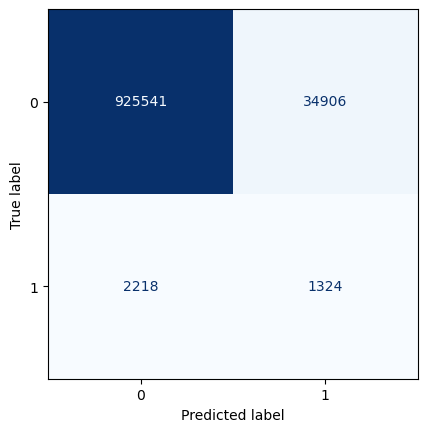

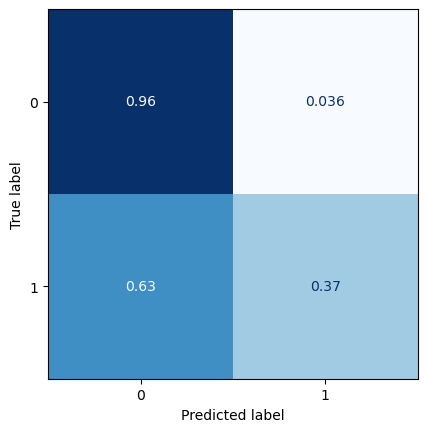

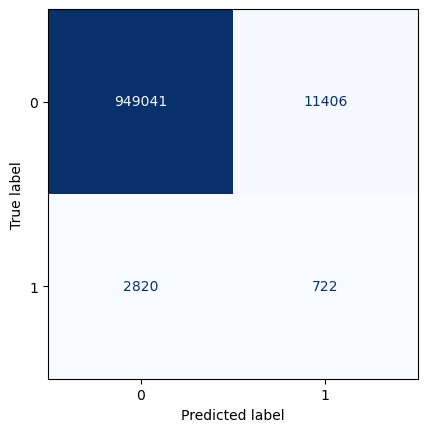

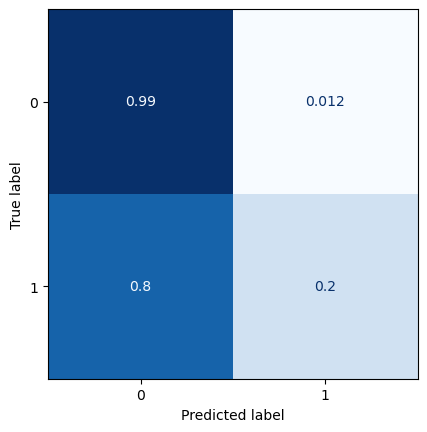

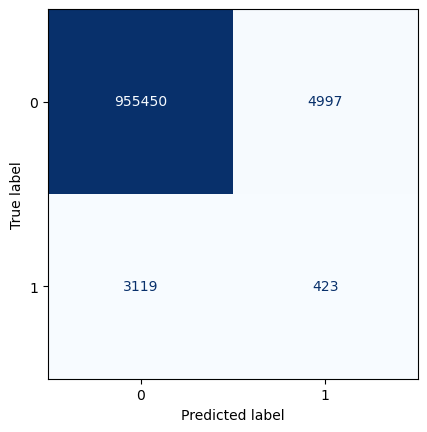

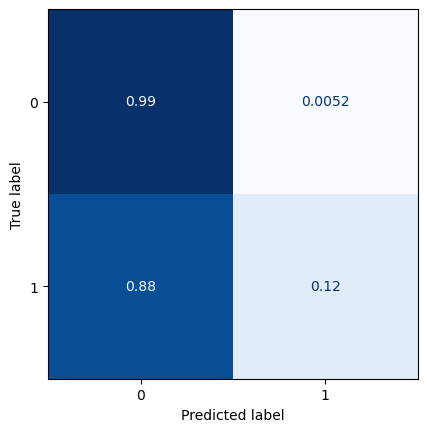

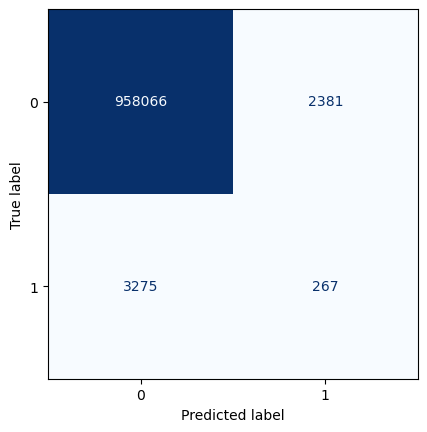

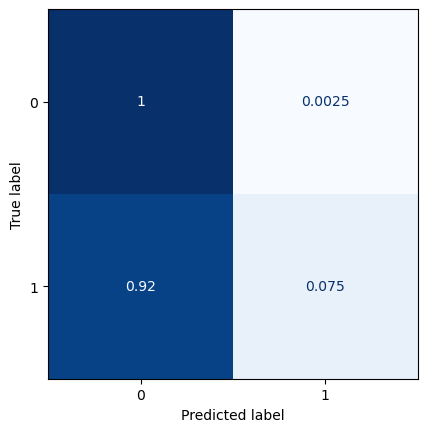

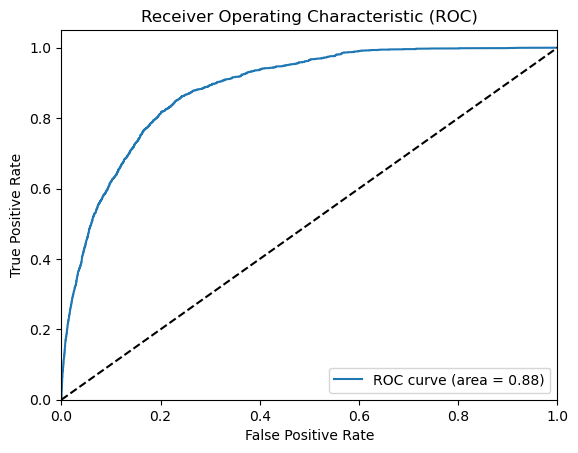

All zeros Brier score: 0.003674315785761041
Model Brier score: 0.003594485734738279


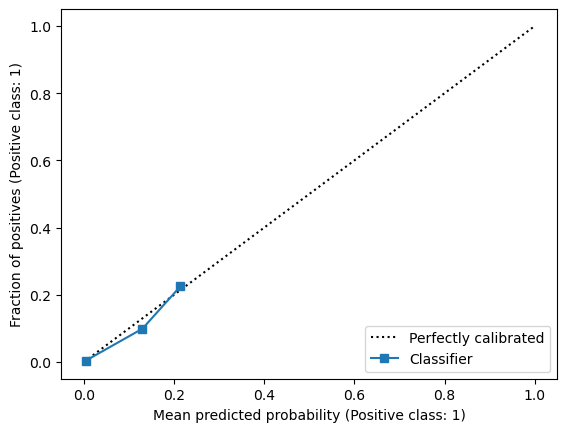

In [136]:
evaluate_perf(ds_img_std,y_ds1_img,day=0)

In [135]:
11310 / 377

30.0